In [77]:

# Cette ligne sert à afficher les dessins dans la page
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *

#from scipy import *
# Cette ligne sert à afficher des dessins plus gros
rcParams['figure.figsize'] = [6, 6]

# L1 Algèbre 

## TD n° 1 BIS -  Enveloppe Convexe.  Suivi d'un peu  plus de géométrie dans $ \mathbf R^2$.

###  Convexité. 
La finalité de ce Tp est de tracer l'enveloppe convexe d'un ensemble de points. 

Un sous-ensemble $F$ de $ \mathbf R^2$ est ** convexe** si pour tous points $A,B$ de $F$ le segment $[A,B]$ est convexe. 

Pour les ensembles ci-dessous, dire s'ils sont convexes ou non. On écrira 'print('convexe') ou 'print('non convexe')  en dessous du code selon la réponse. 

Votre réponse


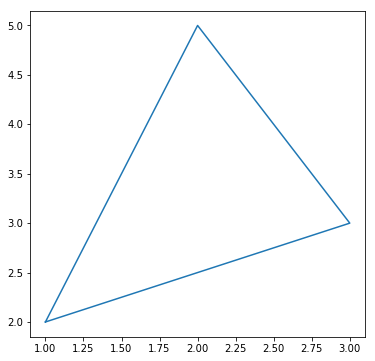

In [78]:
#axis('scaled')
#axis([0,4,0,6])
plot([1,2,3,1],[2,5,3,2])
print('Votre réponse')

Votre réponse


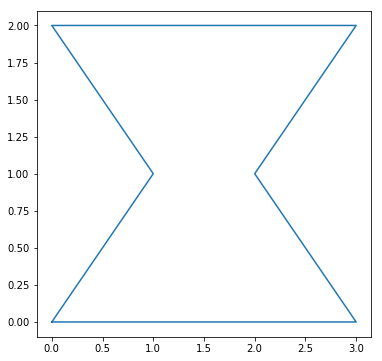

In [79]:
plot([0,3,2,3,0,1,0],[0,0,1,2,2,1,0])
print('Votre réponse')

Votre réponse


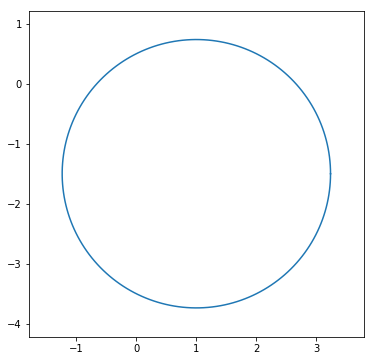

In [80]:
C = array([1, -1.5])
r = sqrt(5)

t = linspace(0, 2 * pi, 200)
#plot(C[0], C[1], "o", color = color)
plot(C[0] + r * cos(t), C[1] + r * sin(t))
plot(C[0] - r - 0.3, C[1] - r - 0.3, marker = None)
plot(C[0] + r + 0.3, C[1] + r + 0.3, marker = None)
axis("equal")
grid(False)

print('Votre réponse')



On définit **l'enveloppe convexe ** d'un ensemble comme étant le plus petit convexe qui contient cet ensemble. 

Dessiner (avec python), l'enveloppe convexe des ensembles de points suivants, donner sous forme de liste de points : 
P1=[[0,0], [2,2],[1,3],[1,2], [-1,1]]
P2=P=[[-1,3],[0,0], [2,2],[1,1],[-1,2], [-1,1]]
(Faire un dessin au brouillon). Quels problèmes rencontrez-vous ? 

On développe les outils de l'algorithme qui nous permettra de tracer l'enveloppe convexe de n'importe quelle famille de points du plan. 

Dans ce qui suit, on se place dans le plan $\mathbf R^2$. Dans Python, on représentera des points ou des vecteurs du plan par des tableaux contenant deux nombres qui représentent leurs coordonnées dans la base canonique.

Python fournit quelques fonctions utiles pour manipuler de tels objets:

-   `norm(u)` renvoie la norme d'un vecteur;
-   `dot(u, v)` renvoie le produit scalaire des vecteurs $\vec u$ et $\vec v$.

Écrire une fonction `normalise(u)` qui renvoie un vecteur ** unitaire ** de même direction et même sens que $\vec u$.


Tester avec 
u=[3,4]

In [81]:

def norm(u):
    ## votre code
    return 

def normalise(u):
    ## votre code
    return []

#Tester avec
u=[3,4]



Écrire une fonction `vec(A,B)` qui à deux points du plan $A,B$ associe le vecteur $\overrightarrow{AB}$.

In [82]:
def vec(A,B):
    ## votre code
    return 

Écrire une fonction `COS(A,B,C)` qui à trois points du plan $A,B, C$ associe le cosinus de l'angle de vecteur  $(\overrightarrow{AB}, \overrightarrow{AC})$.

Tester sur les points : (faire un dessin au brouillon)

A=[0,0]

B=[2,0]

C=[0,2]
ou
C1=[1,1] ou 
C2=[-1,-2$\sqrt{3}$]

In [83]:
def COS(A,B,C):
    ## votre code
    return 

#Tester avec 
A=[0,0]
B=[2,0]
C=[1,1]
#COS(A,B,C)

De même,écrire une fonction `SIN(A,B,C)` qui à trois points du plan $A,B, C$ associe le sinus de l'angle de vecteur  $(\overrightarrow{AB}, \overrightarrow{AC})$.

Tester sur les points précédents.  

In [84]:
def SIN(A,B,C):
    ## votre code
    
    
    return 





# Tester avec    
A=[0,0]
B=[2,0]
C=[1,1]
#SIN(A,B,C)

On donne une liste $P$ de points et deux points $A,B$, $A \not= B$. Définir une fonction  
`LePlusADroite(A,B,P)` qui donne le point de la famille de points  de P 
 qui est le plus à droite de  la demi-droite [A,B). 
 
On utilisera pour cela la fonction COS définie précédemment qui permettra de repérer l'angle  de vecteur $(\overrightarrow{AB}, \overrightarrow{AP[i]})$ et trouver le point de la liste $P$ pour lequel l'angle est minimal, c-à-d. l'angle extérieur maximal. (voir dessin sur moodle).   

Tester sur : 
A=[2,2]
B=[1,3]
P=[[0,0], [2,2],[1,3],[1,2], [-1,1]]

In [85]:
def LePlusADroite(A,B,P):
     ## votre code
        return 
    
## faire des dessins    
## Tester avec A=[0,0] B=[0,1], 
##P=[[0,0], [2,2],[1,3],[1,2], [-1,1]]

On donne une liste $P$ de points dont on veut tracer l'enveloppe convexe. On suppose que P[0] est un point d'ordonnée minimale et parmi ces points celui d'abscisse minimale. 

L'algorithme utilisé est appelé ** Marche de Jarvis **, il consiste à partir du point $P=P[0]$ de construire son point M le plus à droite, puis idem le point le plus à droite  de la demi-droite$[P,M)$ et ainsi de suite. L'algorithme rend la liste des sommets de l'enveloppe convexe donnée dans le sens trigonométrique. 

Algorithme : ALGORITHME DE JARVIS (1973): 

**Données** : Un ensemble de $n$ points du plan  
**Résultat** : La liste $L$ des sommets de l'enveloppe convexe de P donnée dans le sens direct.

1 Début :

2 A = le point d'ordonnée minimale (P[0] par hypothèse)

3 M= point courant=$[P[0][0]+1,P[0][1]]$

4 Initialiser L=[P[0]]

5 Tant que $M\not=P[0]$ répéter : 

6 Prendre Pointsuivant=B =LePlusADroite(M,A,P)
 
7 Ajouter B à L

8 A=M

9  M = B

11 rendre L

Fin 

Ecrire une fonction `MarcheJarvis(P)` qui rend la liste des sommets extrémaux de l'enveloppe convexe de l'ensemble des points donnés par la liste $P$. 

Tester sur les listes : 
P=[[0,0], [2,2],[1,3],[1,2], [-1,1]]
P=[[0,0],[0,3],[3,0], [2,2],[1,3],[0.5,2],[1,5],[-5,4], [-1,1]]


In [86]:
def MarcheJarvis(P):
    L=[P[0]]
    A=[P[0][0],P[0][1]] ### initialisation de A  au point d'ordonnée minimale 
    M=[P[0][0]+1,P[0][1]] #### point courant
  #Votre Code


P=[[0,0],[0,3],[3,0], [2,2],[1,3],[0.5,2],[1,5],[-5,4],[-1,1]]



#Pour tester enlever les #
#axis('scaled')
#axis([-6,6,0,6])


#for j in range(len(P)):
    #print(P[j])
  #  plot([P[j][0]],[P[j][1]],'o')

#T=MarcheJarvis(P)

#X=[T[j][0] for j in range(len(T))]
#X.append(T[0][0])
#Y=[T[j][1] for j in range(len(T))]
#Y.append(T[0][0])
#print('T=',T)
#plot(X,Y)
     

## Plus de géométrie dans $\mathbf R^2$

Dans la cellule qui suit, on donne la fonction `display_vect` qui permet d'afficher des vecteurs à l'écran. Les paramètres `name`, `origin` et `color` sont optionnels.

TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

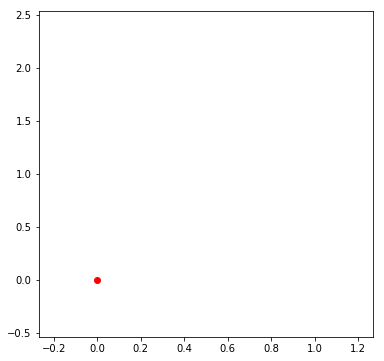

In [88]:
def display_vect(vect, name = "", origin = zeros([2]), color = "k"):
    plot(origin[0], origin[1], marker = "o", color = color)
    plot(origin[0] - 0.2 * vect[0], origin[1] - 0.2 * vect[1], marker = None)
    plot(origin[0] + 1.2 * vect[0], origin[1] + 1.2 * vect[1], marker = None)
    v = vect / norm(vect)
    r = 0.2 * sqrt(norm(vect))
    arrow(origin[0], origin[1], vect[0] - r * v[0], vect[1] - r * v[1], 
          head_width = 0.5 * r, head_length = r,
          fc = color, ec = color)
    o = angle(- vect[1] + 1j * vect[0]) % pi
    v = 0 * array([cos(o), sin(o)])
    if o > 0.6 * pi:
        ha = "right"
    elif o < 0.4 * pi:
        ha = "left"
    else:
        ha = "center"
    if name == "":
        t = ""
    else:
        t = "$\overrightarrow{" + name + "}$"
    text(origin[0] + 0.5 * vect[0] + v[0], origin[1] + 0.5 * vect[1] + v[1], t, 
         color = color, ha = ha, va = "bottom", rotation = o * 180 / pi - 90, size = 15)
    axis("scaled")
    grid(True)
    xticks(arange(trunc(xlim()[0]), ceil(xlim()[1]), 1))
    yticks(arange(trunc(ylim()[0]), ceil(ylim()[1]), 1))

u = array([1, 2])
v = array([2, -2])
display_vect(u, name = "u", color = "red")
display_vect(v, origin = u, name = "v", color = "green")
display_vect(u + v, name = "u+v", color = "blue")

Soient $\vec u$ et $\vec v$ deux vecteurs avec $\vec v$ non nul. Écrire une fonction `project(u, v)` qui renvoie la projection orthogonale du vecteur $\vec u$ sur la droite de vecteur directeur $\vec v$. L'utiliser pour calculer la projection du vecteur $(-1,3)$ sur le vecteur $(4,-1)$ et afficher le dessin des trois vecteurs.


None


TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'

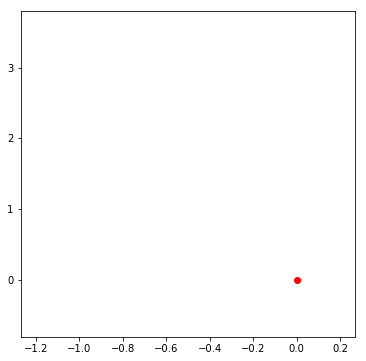

In [75]:
def project(u, v):
         ## votre code
    return 

u = array([-1, 3])
v = array([4, -1])
w = project(u, v)
print w

display_vect(u, name = "u", color = "red")
display_vect(v, name = "v", color = "green")
#display_vect(w, name = "p(u)", color = "blue")


Écrire une fonction `reflect(u, v)` qui renvoie le symétrique du vecteur $\vec u$ par rapport à la droite de vecteur directeur $\vec v$. La tester avec les vecteurs $\vec u$ et $\vec v$ de la question précédente.

In [67]:
def reflect(u, v):
    #Votre code
    return
    
u =array([-1, 3])
v = array([4, -1])
#w = reflect(u, v)
print w

#display_vect(u, name = "u", color = "red")
#display_vect(v, name = "v", color = "green")
#display_vect(project(u, v), name = "p(u)", color = "blue")
#display_vect(w, name = "r(u)", color = "black")

None


##  Géométrie dans l'espace

On se place à présent dans l'espace $\mathbf R^3$. On représentera cette fois des points ou des vecteurs de l'espace par des listes contenant trois nombres qui représentent leurs coordonnées dans la base canonique.

On dispose des fonctions suivantes:

 renvoie la norme d'un vecteur;
-   `dot(u, v)` renvoie le produit scalaire des vecteurs $\vec u$ et $\vec v$;
-   `cross(u, v)` renvoie le produit vectoriel des vecteurs $\vec u$ et $\vec v$.

Si besoin, redéfinir les fonctions   `norm(u)`, `normalize(u)`

In [68]:
u=[1,2,3]
v=[1, 2,2]

def norm(u):   
         ## votre code
    return 
norm(v)

def normalise(u):
         ## votre code
    return 

normalise(v)

Définir une fonction `vec_libres(u,v)`qui renvoie True si les vecteurs $u,v$ sont indépendants et False sinon. 
Tester sur : 

u=[1,2,3]
v=[1, 2,2]

puis sur :

u=[1,2,3]
v=[2, 4,6]




In [69]:
def vec_libres(u,v):
         ## votre code
        return 
    
    
u=[1.,2.,3.]
v=[1., 2.,2.]
v1=[2., 4.,6.]
print(vec_libres(u,v))
print(vec_libres(u,v1))

None
None


Soient $\vec u$ et $\vec v$ $\vec w$ trois vecteurs avec $\vec v$, $\vec w$ indépendants. Écrire une fonction `project(u, v, w)` qui vérifie si   $(\vec v$, $\vec w)$ sont indépendants et qui dans ce cas renvoie la projection orthogonale du vecteur $\vec u$ sur le plan de base  $(\vec v, \vec w)$ et renvoie 'None' sinon. L'utiliser pour calculer la projection orthogonale du vecteur $(-6.,4.,8.)$ sur le plan engendré par $\vec v=(1,1,1)$ et $\vec w=(1,0,1)$. 


In [70]:
 def project(u, v, w):
             ## votre code
            return 
   
u=[-6.,4.,8.]
v=[1.,1.,1.]
w=[1.,0.,1.] 
print(project(u, v, w))

None


Écrire une fonction `reflect(u, v,w)` qui renvoie l'image  du vecteur $\vec u$  par la réflexion orthogonale par rapport au plan de base  $\vec v, \vec w$. La tester avec les vecteurs $\vec u$ et $\vec v, \vec w$ de la question précédente. Vérifier que $reflect \circ reflect=Id$


In [71]:
def reflect(u, v,w): 
    return 

u=[-6.,4.,8.]
v=[1.,1.,1.]
w=[1.,0.,1.] 
print(reflect(u, v, w))
print(reflect(reflect(u,v,w),v,w))

None
None


### Plans dans l'espace. 
On peut représenter un plan $(P)$
de $\mathbf R^3$
de différentes manières:
- comme un triplet de trois points non alignés
$(A,B,C)$, où $(P)$ est le plan  passant par $A$,$B$,$C$.
- sous la forme d'un 
quadruplet $(a,b,c,d)$ où $ax + by + cz+d=0$
est une équation de $(P)$.
- comme un triplet
$(p,v,w)$ avec $v,w$ deux vecteurs non colinéaires de $\mathbf R^3$, et où $(P)$
 est le plan  passant par le point $p$ et de direction $v,w$. 
- comme un couple $(p, n)$ où $p$ est un point du plan et $n$ un vecteur normal au plan.  

### Exercice.
Écrire une fonction `intersectionPlanDroite` d'une droite et d'un plan, 
qui prend comme arguments un point $p$, un vecteur $u$, pour définir la droite $p+\mathbf{R}u$ et un plan  sous forme d'un quadruplet $(a,b,c,d)$ et qui renvoie le point d'intersection de la droite passant par le point $p$ et de direction $v$ et le plan d'équation $ax + by + cz+d = 0$. Si le plan et la droite sont parallèles, la fonction renvoie *None*.


In [73]:
def intersectionPlanDroite(p,u,a,b,c,d):
         ## votre code
        return 
    
####Tester sur p=[0,0,0] u=[1.,1.,1.] a=1 b=1 c=1 d=1

p=[0,0,0]
u=[1.,1.,1.]
a=1
b=1
c=1
d=1
#### puis prendre u=[1,-1,0]
print(intersectionPlanDroite(p,u,a,b,c,d))        
        
    

None
